### **Hands-On Module: Gambaran Umum tentang Berbagai Sinyal dalam Kehidupan Nyata**

Modul hands-on ini dirancang untuk memberikan gambaran tentang berbagai jenis sinyal dalam kehidupan nyata, termasuk sinyal fisiologis, lingkungan, komunikasi, dan mekanik. Menggunakan pustaka Python, kita akan mensimulasikan dan memvisualisasikan sinyal-sinyal ini untuk memahami karakteristiknya.

#### **1. Mempersiapkan Lingkungan**

Sebelum kita mulai, mari kita instal paket Python yang diperlukan. Anda dapat menginstalnya menggunakan perintah berikut:

```bash
pip install neurokit2 obspy scipy matplotlib PyWavelets mne
```

Setelah paket-paket terinstal, kita dapat mulai mengimpor pustaka yang diperlukan.

In [1]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client

### **2. Sinyal Fisiologis**

Sinyal fisiologis sangat penting dalam memantau dan memahami fungsi tubuh manusia. Di sini, kita akan membuat dan memvisualisasikan sinyal ECG, EEG, pernapasan, dan EMG menggunakan NeuroKit2.

#### **2.1. Sinyal ECG (Electrocardiogram)**

Sinyal ECG merepresentasikan aktivitas listrik jantung.

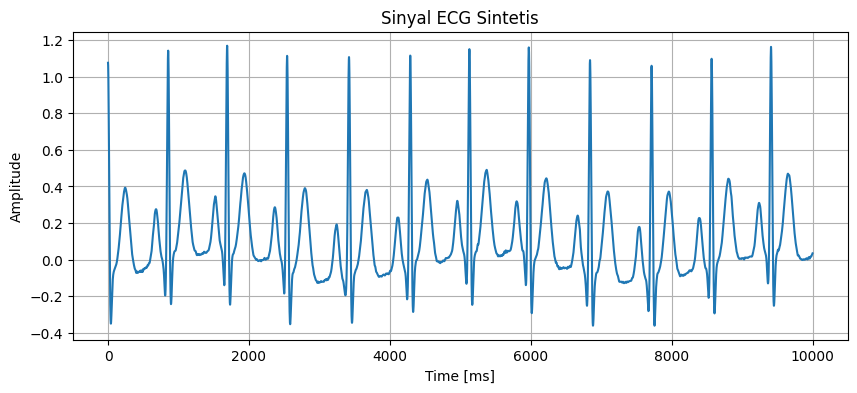

In [2]:
# Membuat sinyal ECG sintetis
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=1000)

# Plot sinyal ECG
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal)
plt.title('Sinyal ECG Sintetis')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### **2.2. Sinyal EEG (Electroencephalogram)**

> Paket `mne` sangat besar. Persiapkan internet untuk mengunduh library hingga 2GB

Sinyal EEG memantau aktivitas listrik otak.

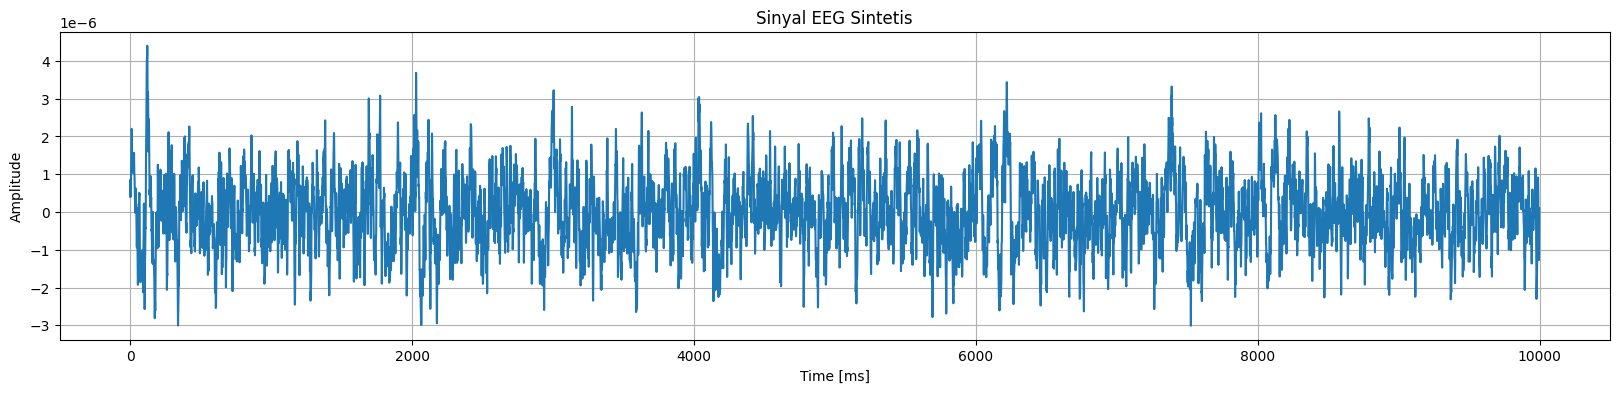

In [4]:
# Membuat sinyal EEG sintetis
eeg_signal = nk.eeg_simulate(duration=10, sampling_rate=1000, noise=0.1)

# Plot sinyal EEG
plt.figure(figsize=(20, 4))
plt.plot(eeg_signal)
plt.title('Sinyal EEG Sintetis')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### **2.3. Sinyal Pernapasan**

Sinyal pernapasan melacak siklus pernapasan.

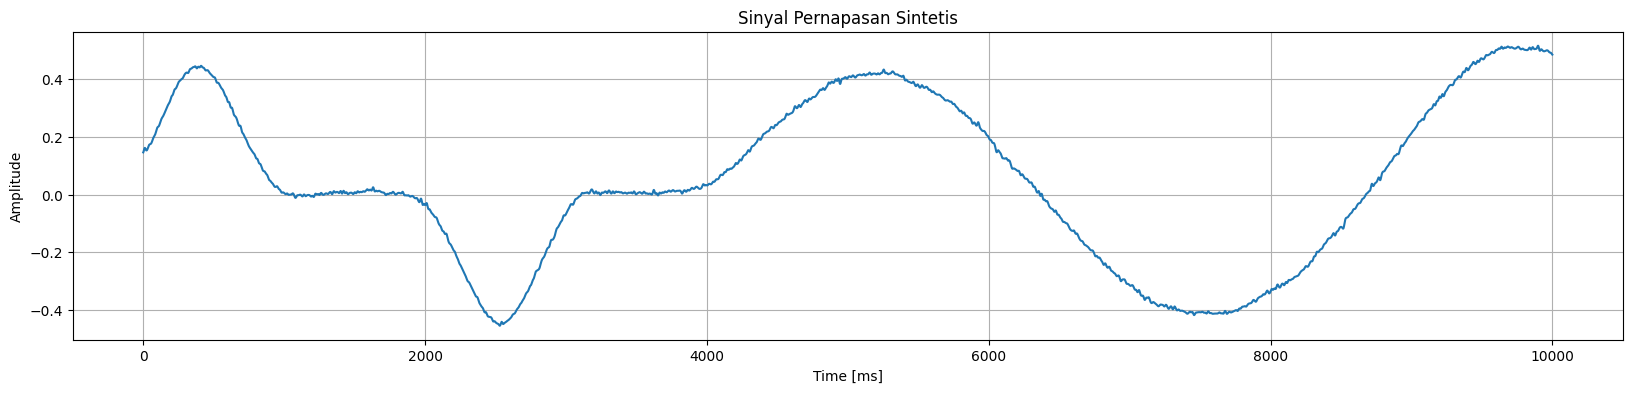

In [6]:
# Membuat sinyal pernapasan sintetis
respiration_signal = nk.rsp_simulate(duration=10, sampling_rate=1000, respiratory_rate=15)

# Plot sinyal pernapasan
plt.figure(figsize=(20, 4))
plt.plot(respiration_signal)
plt.title('Sinyal Pernapasan Sintetis')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### **2.4. Sinyal EMG (Electromyogram)**

Sinyal EMG mengukur aktivitas otot.

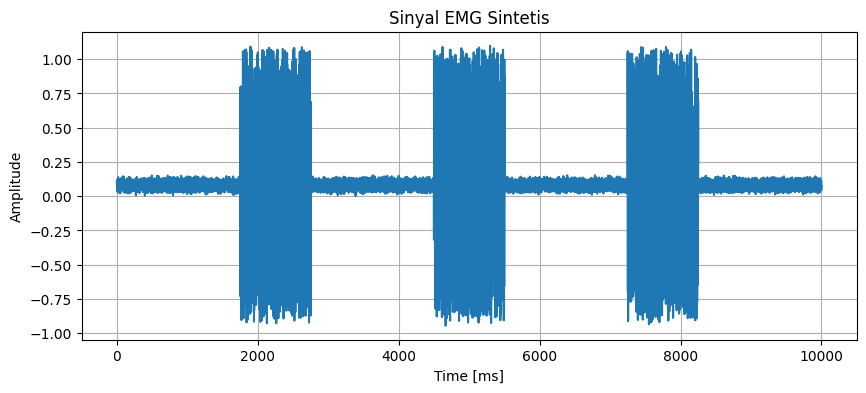

In [7]:
# Membuat sinyal EMG sintetis
emg_signal = nk.emg_simulate(duration=10, sampling_rate=1000, burst_number=3)

# Plot sinyal EMG
plt.figure(figsize=(10, 4))
plt.plot(emg_signal)
plt.title('Sinyal EMG Sintetis')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **3. Sinyal Lingkungan**

Sinyal lingkungan dapat digunakan untuk memantau fenomena alam. Di sini, kita akan mensimulasikan sinyal seismik dan suhu.

#### **3.1. Sinyal Seismik**

Sinyal seismik digunakan untuk mempelajari getaran yang merambat melalui Bumi, sering kali disebabkan oleh gempa bumi.

<Figure size 1000x400 with 0 Axes>

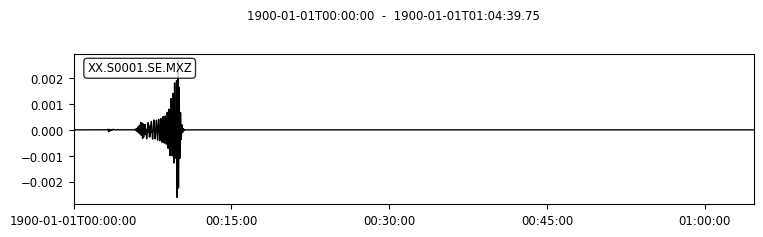

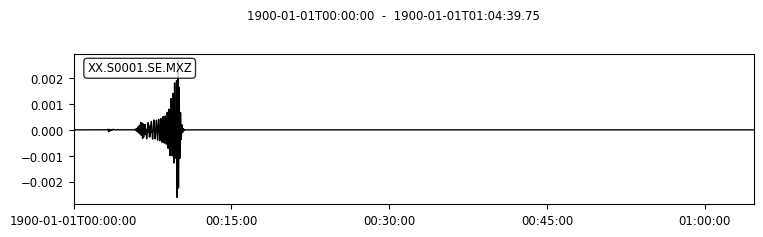

In [12]:
import obspy
from obspy.clients.syngine import Client
import matplotlib.pyplot as plt

# Initialize the Syngine client
client = Client()

# Request a synthetic seismogram
origin_time = obspy.UTCDateTime("2022-01-01T00:00:00")
seismogram = client.get_waveforms(model="ak135f_5s",
                                  sourcelatitude=0,
                                  sourcelongitude=0,
                                  sourcedepthinmeters=10000,
                                  receiverlatitude=10,
                                  receiverlongitude=10,
                                  components="Z",
                                  units="displacement")

# Plot the seismic waveform
plt.figure(figsize=(10, 4))
seismogram.plot()


#### **3.2. Sinyal Suhu**

Sinyal suhu dapat menunjukkan variasi dari waktu ke waktu, yang mungkin berguna dalam studi iklim.

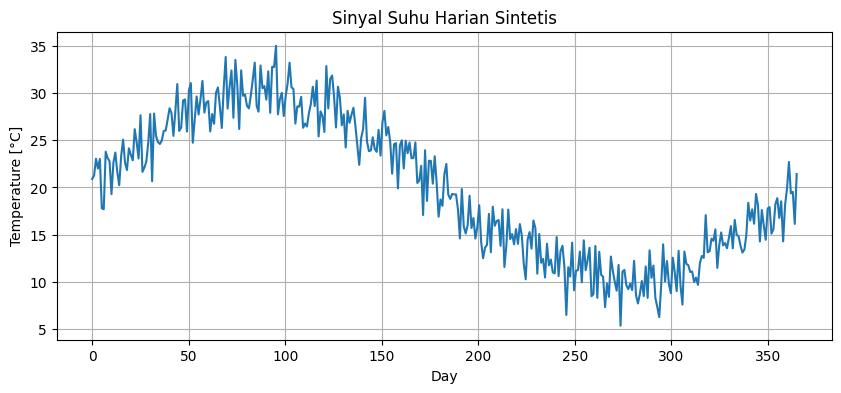

In [9]:
t = np.linspace(0, 365, 365)  # Data satu tahun

# Simulasikan variasi suhu harian dengan noise
temperature_signal = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# Plot sinyal suhu
plt.figure(figsize=(10, 4))
plt.plot(t, temperature_signal)
plt.title('Sinyal Suhu Harian Sintetis')
plt.xlabel('Day')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

### **4. Sinyal Komunikasi**

Sinyal komunikasi digunakan dalam berbagai bentuk transmisi data. Di sini, kita akan membuat sinyal amplitude modulated (AM).

#### **4.1. Sinyal AM (Amplitude Modulated Signal)**

Sinyal AM sering digunakan dalam komunikasi radio.

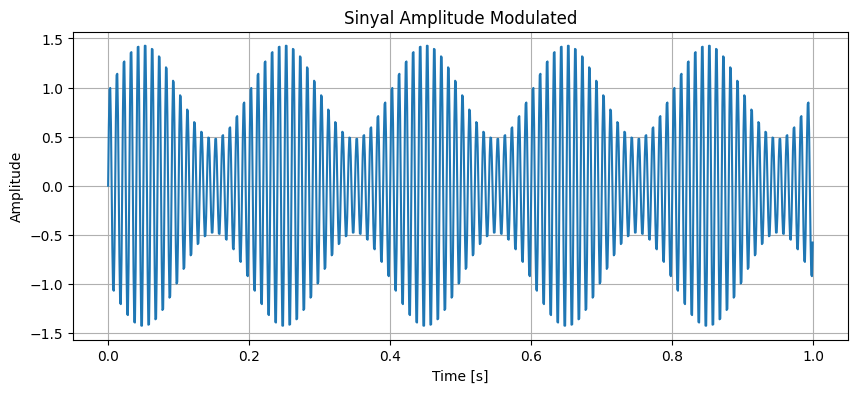

In [10]:
# Parameter
fs = 1000  # Sampling frequency
carrier_freq = 100  # Carrier frequency in Hz
modulating_freq = 5  # Modulating frequency in Hz

t = np.linspace(0, 1, fs, endpoint=False)  # Vektor waktu
carrier = np.sin(2 * np.pi * carrier_freq * t)  # Sinyal pembawa
modulating_signal = 1 + 0.5 * np.sin(2 * np.pi * modulating_freq * t)  # Sinyal modulasi

# Sinyal amplitude modulated
am_signal = carrier * modulating_signal

# Plot sinyal AM
plt.figure(figsize=(10, 4))
plt.plot(t, am_signal)
plt.title('Sinyal Amplitude Modulated')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **5. Sinyal Mekanik**

Sinyal mekanik sering melibatkan getaran atau gaya yang bekerja pada suatu sistem. Kita akan membuat sinyal getaran sederhana.

#### **5.1. Sinyal Getaran**

Sinyal getaran digunakan untuk memantau mesin dalam pemeliharaan prediktif.

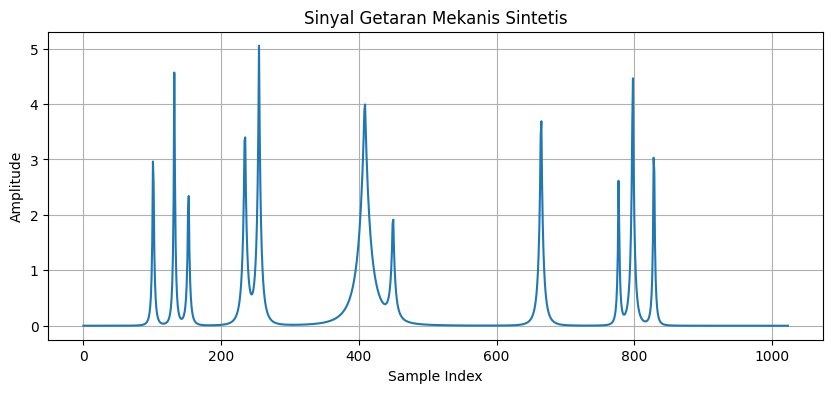

In [11]:
vibration_signal = pywt.data.demo_signal('Bumps', n=1024)

# Plot sinyal getaran
plt.figure(figsize=(10, 4))
plt.plot(vibration_signal)
plt.title('Sinyal Getaran Mekanis Sintetis')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **Kesimpulan**

Dalam modul hands-on ini, Anda telah mengeksplorasi berbagai jenis sinyal kehidupan nyata di berbagai bidang:

- **Sinyal Fisiologis**: ECG, EEG, pernapasan, dan EMG, yang sangat penting untuk memantau fungsi tubuh.
- **Sinyal Lingkungan**: Sinyal seismik dan suhu, yang berguna dalam mempelajari fenomena alam.
- **Sinyal Komunikasi**: Sinyal AM, yang merupakan dasar dari transmisi data.
- **Sinyal Mekanik**: Sinyal getaran, yang penting untuk pemantauan dan pemeliharaan mesin.

Simulasi ini memberikan gambaran tentang bagaimana sinyal-sinyal dunia nyata dapat dibuat dan dianalisis menggunakan Python, yang merupakan keterampilan yang berharga dalam bidang seperti teknik biomedis, ilmu lingkungan, sistem komunikasi, dan teknik mesin.